In [ ]:
#hide
from pyanomaly.stats import *

# pyanomaly

> Conjunto de algoritmos para detectar anomalias em Series Temporais.

    Zscore Robusto
    Tukey

###TODO

## Install

####TODO `pip install pyanomaly`

## Como usar

Iremos realizar os testes no dataset contendo temperaturas diarias da cidade de Melbourne.

dataset: https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

In [ ]:
import numpy as np
import pandas as pd
# plot
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_csv('./dados/daily-min-temperatures.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df.head(5).T

Date,1981-01-01,1981-01-02,1981-01-03,1981-01-04,1981-01-05
Temp,20.7,17.9,18.8,14.6,15.8


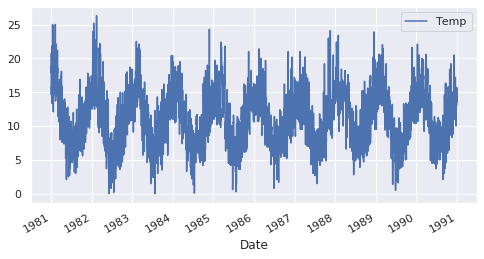

In [ ]:
df.plot(figsize=(8, 4));

**Zscore Robusto**

In [ ]:
mad = MAD()
mad.fit(df['Temp'])
y = mad.predict(df['Temp'])

outliers = df[y==1]
outliers.head()

,Temp
Date,
1981-01-15,25.0
1981-01-18,24.8
1981-02-09,25.0
1982-01-17,24.0
1982-01-20,25.2


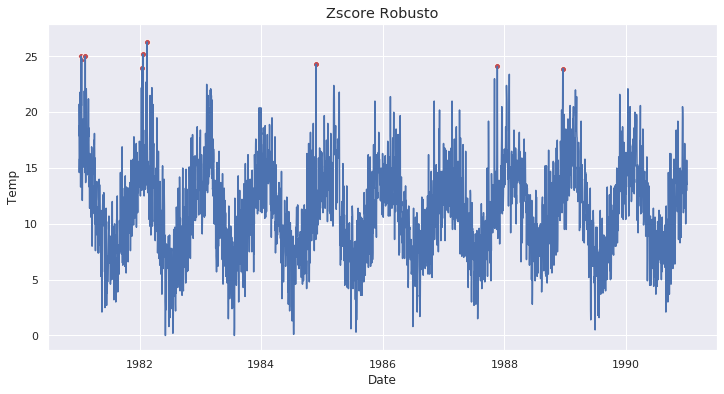

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
                       
sns.lineplot(x=df.index, y=df['Temp'], ax=ax)
sns.scatterplot(x=outliers.index, y=outliers['Temp'], 
                color='r', ax=ax)

plt.title('Zscore Robusto', fontsize='large');

**Tukey**

In [ ]:
tu = Tukey()
tu.fit(df['Temp'])
y = tu.predict(df['Temp'])

outliers = df[y==1]
outliers.head()

,Temp
Date,
1981-01-15,25.0
1981-01-18,24.8
1981-02-09,25.0
1982-01-17,24.0
1982-01-20,25.2


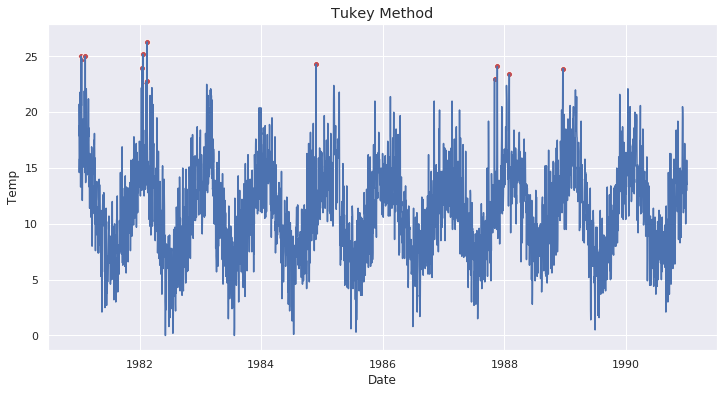

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
                       
sns.lineplot(x=df.index, y=df['Temp'], ax=ax)
sns.scatterplot(x=outliers.index, y=outliers['Temp'], 
                color='r', ax=ax)

plt.title('Tukey Method', fontsize='large');